# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dotenv import load_dotenv
from newsapi import NewsApiClient

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tony\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

Total articles about Bitcoin: 7922


In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

Total articles about Ethereum: 2711


In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df

,date,text,compound,positive,negative,neutral
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879
2,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904
3,2021-10-08,"Last week, the Wall Street Journal ran a piece...",0.3400,0.099,0.000,0.901
4,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...
95,2021-10-30,Shiba inu dogs.\r\nGetty Images\r\nIt's been a...,0.2500,0.057,0.000,0.943
96,2021-10-26,Welcome to 10 Things Before the Opening Bell.\...,0.4588,0.073,0.000,0.927
97,2021-11-07,"Rahul Rai, co-head of Market Neutral at BlockT...",0.0000,0.000,0.000,1.000
98,2021-10-19,The Bitcoin community had its Big Moment recen...,0.8074,0.243,0.000,0.757


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df

,date,text,compound,positive,negative,neutral
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903
...,...,...,...,...,...,...
95,2021-11-02,Cryptocurrency has become increasingly popular...,0.4215,0.088,0.0,0.912
96,2021-10-30,The unlikely and epic rise of shiba inu has pr...,0.2263,0.054,0.0,0.946
97,2021-11-02,Fans of Ethereum are jumping on the anti-infla...,0.0000,0.000,0.0,1.000
98,2021-10-14,"October\r\n14, 2021\r\n5 min read\r\nOpinions ...",0.4588,0.088,0.0,0.912


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.105246,0.046180,0.022020,0.931810
std,0.341649,0.062208,0.045903,0.072445
min,-0.790600,0.000000,0.000000,0.659000
25%,0.000000,0.000000,0.000000,0.893750
50%,0.000000,0.000000,0.000000,0.931500
75%,0.366350,0.079250,0.010250,1.000000
max,0.807400,0.243000,0.280000,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.185482,0.069920,0.023650,0.906420
std,0.353332,0.076423,0.045433,0.087298
min,-0.735100,0.000000,0.000000,0.620000
25%,0.000000,0.000000,0.000000,0.853750
50%,0.096350,0.059000,0.000000,0.919000
75%,0.476700,0.105250,0.038000,1.000000
max,0.916500,0.380000,0.210000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had a higher mean positive sentiment with a value of 0.6992, while bitcoin had a mean positive sentiment of 0.04618

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score of 0.9165, while bitcoin highest compound score was 0.8074

Q. Which coin had the highest positive score?

A: Etherum had the highest postive score of 0.38, while bitcoin highest positive score was 0.243

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [42]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stopwords_list = stopwords.words('english')
stopwords_list.extend(['reuters', 'char'])
# stopwords_list
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and Remove the stop words
    output = [word.lower() for word in lem if word.lower() not in stopwords_list]
    
    return output

In [14]:
# Create a new tokens column for Bitcoin
bitcoin_tokens = []
for bitcoin_headline in bitcoin_headlines['articles']:
    for word in tokenizer(bitcoin_headline['content']):
        bitcoin_tokens.append(word)
# bitcoin_tokens

In [15]:
# Create a new tokens column for Ethereum
ethereum_tokens = []
for ethereum_headline in ethereum_headlines['articles']:
    for word in tokenizer(ethereum_headline['content']):
        ethereum_tokens.append(word)
# ethereum_tokens

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
bitcoint_ngram = Counter(ngrams(bitcoin_tokens, n=2))
# print(dict(bitcoint_ngram))
print(dict(bitcoint_ngram.most_common(10)))

{('exchangetraded', 'fund'): 15, ('new', 'york'): 10, ('illustration', 'taken'): 8, ('bitcoin', 'future'): 8, ('cryptocurrency', 'bitcoin'): 7, ('oct', 'bitcoin'): 7, ('bitcoin', 'seen'): 7, ('representation', 'virtual'): 6, ('virtual', 'cryptocurrency'): 6, ('picture', 'illustration'): 6}


In [18]:
# Generate the Ethereum N-grams where N=2
bitcoint_ngram = Counter(ngrams(ethereum_tokens, n=2))

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
print(token_count(bitcoin_tokens, 10))

[('bitcoin', 90), ('us', 24), ('new', 20), ('fund', 20), ('ha', 19), ('oct', 18), ('first', 18), ('cryptocurrency', 17), ('etf', 17), ('ceo', 17)]


In [21]:
# Use token_count to get the top 10 words for Ethereum
print(token_count(ethereum_tokens, 10))

[('cryptocurrency', 28), ('ethereum', 27), ('ha', 27), ('bitcoin', 25), ('new', 14), ('crypto', 14), ('high', 12), ('market', 11), ('ether', 10), ('world', 10)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

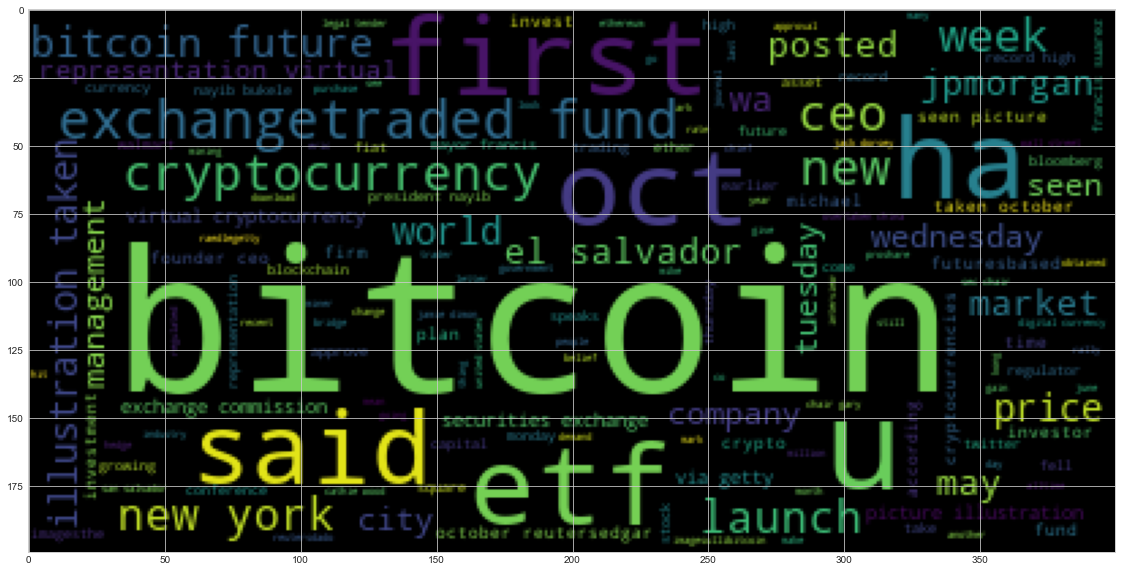

In [23]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(bitcoin_tokens))
plt.imshow(wc)

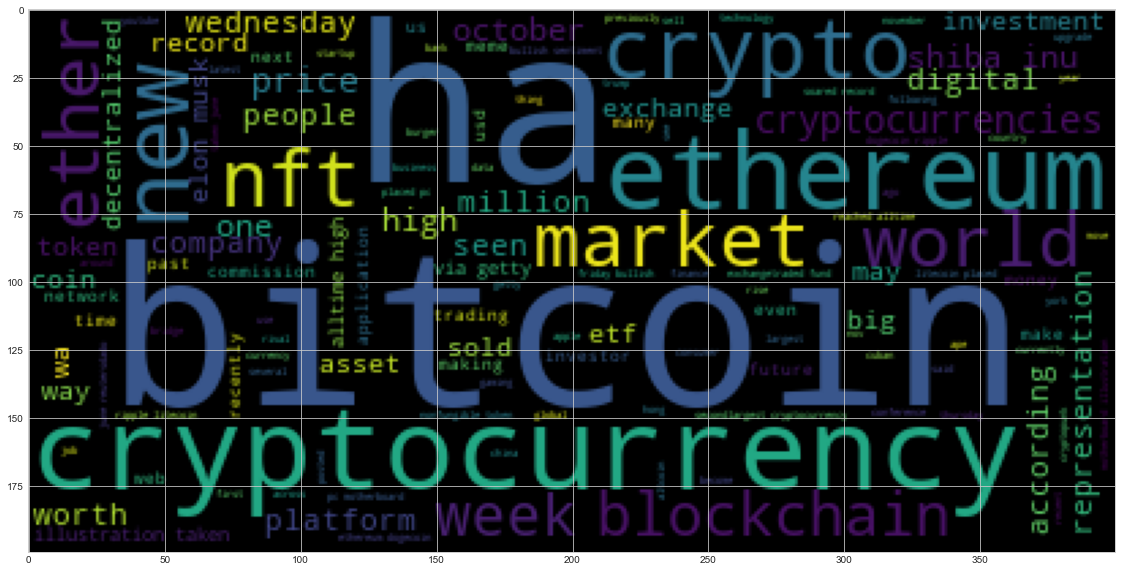

In [24]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(ethereum_tokens))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [68]:
# Concatenate all of the Bitcoin text together
bitcoin_articles = []
for bitcoin_headline in bitcoin_headlines['articles']:
    bitcoin_articles.append(bitcoin_headline['content'])

In [69]:
# Run the NER processor on all of the text
bitcoin_article_string = nlp(' '.join(bitcoin_articles))
# Add a title to the document
bitcoin_article_string.user_data["title"] = "Bitcoin NER"

In [71]:
# Render the visualization
displacy.render(bitcoin_article_string, style='ent')

In [77]:
# List all Entities
bitcoin_entities = [ent.text for ent in bitcoin_article_string.ents]
bitcoin_entities

['earlier this year',
 'Verge',
 'Vox Media',
 'Thiago Prudencio/S',
 '$1.6 billion',
 'Wednesday',
 'a couple of minutes',
 'U.S.',
 'U.S.',
 'China',
 'Last week',
 'the Wall Street Journal',
 'three',
 'Journal',
 'Bitcoin',
 'Bloomberg',
 'the National Bureau',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic/IllustrationHONG KONG',
 'Oct 21',
 'Reuters',
 'October 19, 2021',
 'REUTERS',
 'Edgar SuLONDON',
 'Oct 20',
 'Reuters',
 'Securities and Exchange Commission',
 'Andrew Kelly',
 'The US Securities and Exchange Commission',
 'as many as four',
 'October',
 'October 18, 2021',
 'REUTERS',
 'Edgar SuSINGAPORE',
 'Oct 19',
 'Reuters',
 'six-month',
 'October 19, 2021',
 'REUTERS',
 'Edgar SuHONG KONG',
 'Oct 20',
 'Reuters',
 'Wednesday',
 'first',
 'U.S.',
 'Conway G. Gittens',
 'Reuters',
 'Reuters',
 'six-month',
 'Tuesday',
 'U.S.',
 'NurPhoto',
 'Getty Images',
 'first',
 'Tuesday',
 'ProShares',
 '2021',
 'Marco Bello',
 'The Securities and Exchange Commission',
 'Valkyrie',
 'ET

---

### Ethereum NER

In [74]:
# Concatenate all of the Ethereum text together
ethereum_articles = []
for ethereum_headline in ethereum_headlines['articles']:
    ethereum_articles.append(ethereum_headline['content'])

In [75]:
# Run the NER processor on all of the text
ethereum_article_string = nlp(' '.join(ethereum_articles))

# Add a title to the document
ethereum_article_string.user_data["title"] = "Ethereum NER"

In [76]:
# Render the visualization
displacy.render(ethereum_article_string, style='ent')

In [78]:
# List all Entities
ethereum_entities = [ent.text for ent in ethereum_article_string.ents]
ethereum_entities

['Ethereum',
 'Cardano',
 'Nervos\xa0',
 'today',
 'the Force Bridge',
 'Mark Cuban',
 'CNBC',
 'Wednesday',
 'two',
 'Jordan Mansfield',
 'JPMorgan',
 'Elon Musk',
 'Getty Images',
 'Elon Musk',
 '3,780%',
 'October',
 'Dogelon Mars',
 '0.00000229',
 'November 1',
 '0.0',
 'Getty Images',
 'the past week',
 'Hong Kong',
 'September 30, 2021',
 'FTX',
 'NFT',
 'Robert Nickelsberg',
 'Getty Images',
 'Coinbase Global',
 'NFT',
 'the end of the year',
 'US',
 'NurPhoto',
 'first',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic/Illustration/File Photo MU',
 'Burger King',
 'Robinhood',
 'Bitcoin , Ethereum and Dogecoin',
 'Royal Perks',
 '5',
 'Rahul Rai',
 'Market Neutral',
 'BlockTower Capital',
 'Rahul Rai',
 'Rahul Rai',
 'second',
 '4,400',
 'Friday',
 'Ethereum',
 'Bitcoin’s',
 'second',
 'Thursday',
 '6:13 p.m.',
 'New York',
 'Ethereum',
 'CryptoPunk',
 '0x8e39',
 'NFT',
 'Lionsgate/Miramax',
 "Quentin Tarantino's",
 '1994',
 'Pulp Fiction',
 'the coming weeks',
 'June 29, 2021',
 'RE

---